In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,timestamp,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,2019-02-23 00:00:00,67.92,0.0,55.72,0.0,-1.56,1.0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,2019-02-23 00:05:00,67.89,0.0,55.74,0.0,-1.51,1.0,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,2019-02-23 00:10:00,67.86,0.0,55.77,0.0,-1.47,1.0,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,2019-02-23 00:15:00,67.84,0.0,55.79,0.0,-1.42,1.0,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,2019-02-23 00:20:00,67.81,0.0,55.82,0.0,-1.38,1.0,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


In [0]:
data = data.drop([ 'Air temperature (C)','Irrigation field 2', 'Irrigation field 3', 'Irrigation field 1', 'Irrigation field 4'
       ,'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)'], axis = 1)

solid1 = data.drop(['Soil humidity 2', 'Soil humidity 3', 'Soil humidity 4'], axis = 1)
solid2 = data.drop([ 'Soil humidity 1', 'Soil humidity 3', 'Soil humidity 4'], axis = 1)
solid3 = data.drop(['Soil humidity 2', 'Soil humidity 1', 'Soil humidity 4'], axis = 1)
solid4 = data.drop(['Soil humidity 2', 'Soil humidity 3', 'Soil humidity 1'], axis = 1)

In [0]:
solid1['timestamp'] = pd.to_datetime(solid1['timestamp'])
solid2['timestamp'] = pd.to_datetime(solid2['timestamp'])
solid3['timestamp'] = pd.to_datetime(solid3['timestamp'])
solid4['timestamp'] = pd.to_datetime(solid4['timestamp'])

In [0]:
start_date_1 = '2019-03-25 22:50:00'
end_date_1 = '2019-03-29 22:50:00'
start_date_2 = '2019-05-25 07:45:00'
end_date_2 = '2019-05-31 09:15:00'
start_date_3 = '2019-04-19 20:15:00'
end_date_3 = '2019-04-23 20:15:00'
start_date_4 = '2019-05-25 07:45:00'
end_date_4 = '2019-05-31 07:45:00'

In [0]:
mask1 = (solid1['timestamp'] >= start_date_1) & (solid1['timestamp'] <= end_date_1)
mask2 = (solid2['timestamp'] >= start_date_2) & (solid2['timestamp'] <= end_date_2)
mask3 = (solid3['timestamp'] >=start_date_3) & (solid3['timestamp'] <= end_date_3)
mask4 = (solid4['timestamp'] >= start_date_4) & (solid4['timestamp'] <= end_date_4)

test_1 = solid1.loc[mask1]
test_2 = solid2.loc[mask2]
test_3 = solid3.loc[mask3]
test_4 = solid4.loc[mask4]

train_1 = solid1.dropna()
train_2 = solid2.dropna()
train_3 = solid3.dropna()
train_4 = solid4.dropna()

In [94]:
test_1[test_1['Soil humidity 1'].notnull()]

,timestamp,Soil humidity 1
9019,2019-03-26 07:35:00,41.0
9380,2019-03-27 13:40:00,42.0
10030,2019-03-29 19:50:00,46.0


In [0]:
all_d = np.concatenate((train_1['Soil humidity 1'].values,train_2['Soil humidity 2'].values, train_3['Soil humidity 3'].values, train_4['Soil humidity 4'].values))

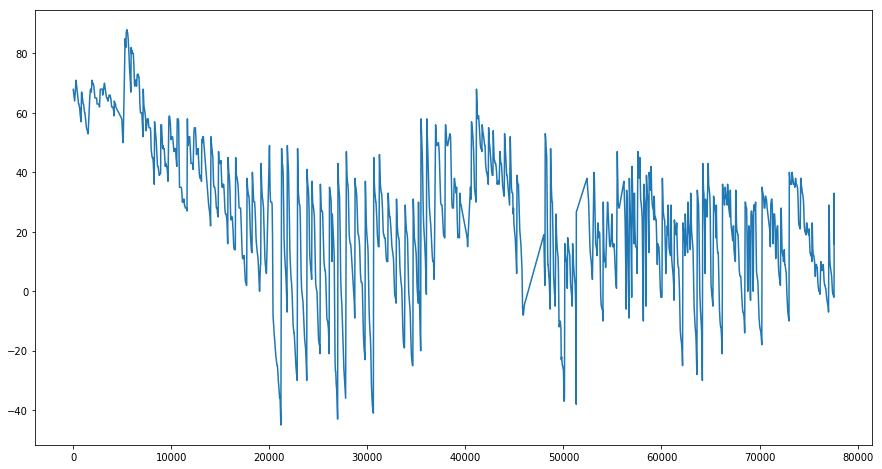

In [206]:
plt.figure(figsize=(15,8))
plt.plot(all_d)

In [0]:
all_test = np.concatenate((test_1['Soil humidity 1'].values, test_2['Soil humidity 2'].values, test_3['Soil humidity 3'].values, test_4['Soil humidity 4'].values))

In [0]:
starting = np.zeros(5782)

In [0]:
starting[0] = 39.86
starting[len(test_1)] = -4
starting[len(test_1) + len(test_2)] = -12.44
starting[len(test_1) + len(test_2) + len(test_3)] = 6.33

In [221]:
len(all_test)

5782

In [222]:
np.argwhere(~(np.isnan(all_test)))[:,0]

array([ 105,  466, 1116, 1814, 2356, 2705, 3075, 3978, 4052, 4118, 4751,
       4949, 5306, 5543])

In [130]:
train_2.isnull().sum()

timestamp          0
Soil humidity 2    0
dtype: int64

In [0]:
X1 = train_1['Soil humidity 1'].astype(float).values
X2 = train_2['Soil humidity 2'].astype(float).values
X3 = train_3['Soil humidity 3'].astype(float).values
X4 = train_4['Soil humidity 4'].astype(float).values

In [116]:
X1[:12]

array([67.92, 67.89, 67.86, 67.84, 67.81, 67.78, 67.76, 67.73, 67.7 ,
       67.68, 67.65, 67.62, 67.59, 67.57, 67.54, 67.51, 67.49, 67.46,
       67.43, 67.41])

In [0]:
from sklearn.metrics import mean_squared_error

def evaluate(test, predictions):
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    print('RMSE: %.3f' % rmse)

In [0]:
train, test = all_d[:int(len(all_d) * 0.75)] , all_d[int(len(all_d) * 0.75):]

In [208]:
print(len(train), len(test))

58209 19404


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)


In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [276]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back) , return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

W0816 02:03:15.277441 139960446388096 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 1, 50)             10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [277]:
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1024)

Epoch 1/100
58207/58207 [==============================] - 6s 104us/step - loss: 1317.9574
Epoch 2/100
58207/58207 [==============================] - 1s 20us/step - loss: 902.7161
Epoch 3/100
58207/58207 [==============================] - 1s 20us/step - loss: 739.8478
Epoch 4/100
58207/58207 [==============================] - 1s 21us/step - loss: 645.3404
Epoch 5/100
58207/58207 [==============================] - 1s 20us/step - loss: 561.3495
Epoch 6/100
58207/58207 [==============================] - 1s 20us/step - loss: 486.5841
Epoch 7/100
58207/58207 [==============================] - 1s 20us/step - loss: 425.5904
Epoch 8/100
58207/58207 [==============================] - 1s 20us/step - loss: 377.6848
Epoch 9/100
58207/58207 [==============================] - 1s 20us/step - loss: 336.9943
Epoch 10/100
58207/58207 [==============================] - 1s 20us/step - loss: 301.8050
Epoch 11/100
58207/58207 [==============================] - 1s 20us/step - loss: 271.7527
Epoch 12/100
5820

In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

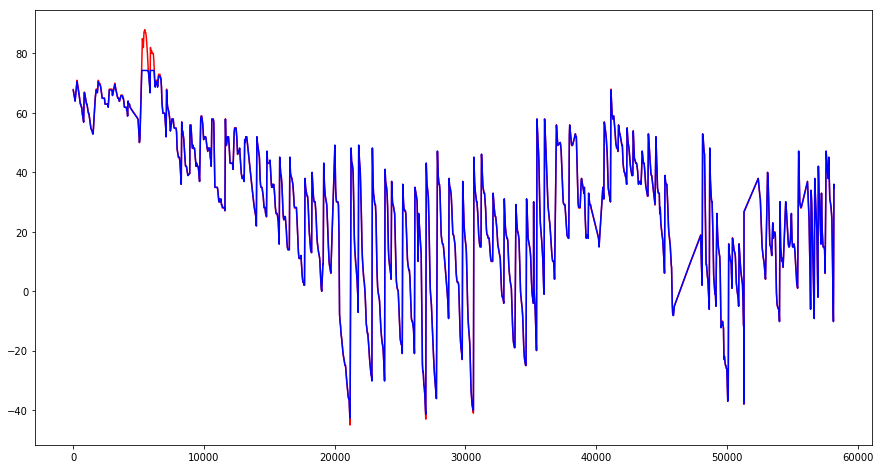

In [279]:
plt.figure(figsize=(15,8))
plt.plot(trainY, c = 'r')
plt.plot(trainPredict[:, 0], c = 'b')
plt.show()

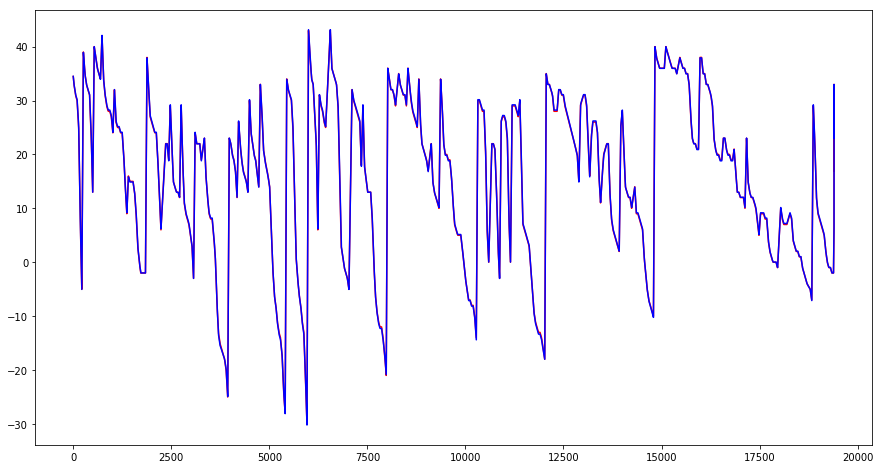

In [280]:
plt.figure(figsize=(15,8))
plt.plot(testY, c = 'r')
plt.plot(testPredict[:, 0], c = 'b')
plt.show()

In [281]:
evaluate(testY, testPredict[:,0])

RMSE: 0.344


In [235]:
print(len(test_1) , len(test_1) + len(test_2) ,len(test_1) + len(test_2)+  len(test_3))

1153 2900 4053


In [233]:
indexes = np.argwhere(~(np.isnan(all_test)))[:,0]
indexes

array([ 105,  466, 1116, 1814, 2356, 2705, 3075, 3978, 4052, 4118, 4751,
       4949, 5306, 5543])

In [232]:
len(all_test)

5782

In [243]:
5 - np.nan

nan

In [282]:
prediction = list()
last_value = starting[0]
for i in range(len(all_test)):
    if i == 1153:
       last_value = staring[1153]
    elif i == 2900:
       last_value = staring[2900]
    elif i == 4053:
       last_value = staring[4053]
        
    if i in indexes:
      prediction.append(all_test[i])
      last_value = all_test[i]
      continue

    yhat = model.predict(np.array([[[last_value]]]))[0][0]    
    '''result =last_value - yhat 
    sign = np.sign(result)
    final = last_value - sign * (result) '''
    prediction.append(yhat)
    last_value = yhat
    print(i, yhat )

0 39.827362
1 39.79267
2 39.75586
3 39.716877
4 39.675674
5 39.63221
6 39.586475
7 39.53844
8 39.48813
9 39.43517
10 39.379105
11 39.31991
12 39.257595
13 39.1922
14 39.123795
15 39.05248
16 38.9784
17 38.901733
18 38.82269
19 38.741512
20 38.658474
21 38.57389
22 38.48809
23 38.401417
24 38.314243
25 38.226936
26 38.138382
27 38.047848
28 37.955685
29 37.862286
30 37.768055
31 37.673416
32 37.578796
33 37.484615
34 37.391285
35 37.299202
36 37.208744
37 37.12025
38 37.034027
39 36.950344
40 36.86943
41 36.79148
42 36.716644
43 36.64503
44 36.57672
45 36.511753
46 36.450134
47 36.39184
48 36.336838
49 36.28505
50 36.236397
51 36.190777
52 36.148087
53 36.108204
54 36.071003
55 36.036358
56 36.004135
57 35.974205
58 35.946438
59 35.920704
60 35.896877
61 35.874836
62 35.85383
63 35.831535
64 35.807903
65 35.782875
66 35.756405
67 35.728443
68 35.698944
69 35.667866
70 35.635174
71 35.600838
72 35.564835
73 35.52714
74 35.48775
75 35.44666
76 35.403877
77 35.359417
78 35.313313
79 35.265

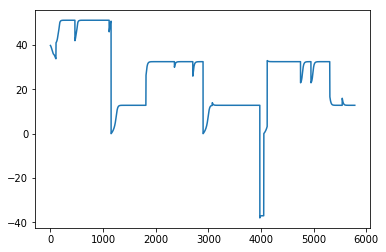

In [283]:
plt.plot(prediction)

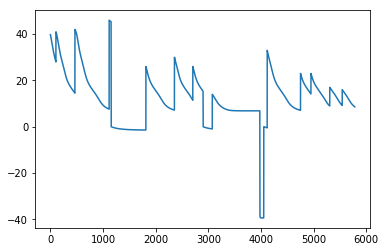

In [259]:
plt.plot(prediction)

In [0]:
field1 = np.array(prediction)

In [0]:
field2 = np.array(prediction)

In [0]:
field3 = np.array(prediction)

In [0]:
field4 = np.array(prediction)

In [0]:
all_ = (np.concatenate((field1,field2,field3,field4)))

In [202]:
all_

array([45.97841164, 45.95675912, 45.93504237, ..., 15.82374619,
       15.82301127, 15.82227644])

In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
X, y = split_sequence(train, 1153)

In [0]:
X

array([[67.92, 67.89, 67.86, ..., 60.22, 60.19, 60.17],
       [67.89, 67.86, 67.84, ..., 60.19, 60.17, 60.14],
       [67.86, 67.84, 67.81, ..., 60.17, 60.14, 60.11],
       ...,
       [87.  , 87.  , 87.  , ..., 72.  , 72.  , 72.  ],
       [87.  , 87.  , 87.  , ..., 72.  , 72.  , 72.  ],
       [87.  , 87.  , 87.  , ..., 72.  , 72.  , 72.  ]])

In [0]:
Xt, yt = split_sequence(test, 3)

In [0]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [0]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1153, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
model.fit(X, y, epochs=10)

In [0]:
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(Xt)
print(yhat)

[[71.99012 ]
 [71.99012 ]
 [71.99012 ]
 ...
 [37.071335]
 [38.007877]
 [38.871597]]


In [0]:
evaluate(yt, yhat)

RMSE: 1.243


In [0]:
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    yhat = np.average(history[-5:] , weights= [5,4,3,2,1])
    predictions.append(yhat)
    history.append(yhat)

In [0]:
evaluate(test, predictions)

RMSE: 21.126


In [0]:
history = [x for x in X1]
predictions_1 = list()

for i in range(len(test_1)):
    yhat = np.average(history[-3:])
    predictions_1.append(yhat)
    history.append(obs)

In [0]:
history = [x for x in X2]
predictions_2 = list()

for i in range(len(test_2)):
    yhat = np.average(history[-3:])
    predictions_2.append(yhat)
    history.append(obs)

In [0]:
history = [x for x in X3]
predictions_3 = list()

for i in range(len(test_3)):
    yhat = np.average(history[-3:])
    predictions_3.append(yhat)
    history.append(obs)

In [0]:
history = [x for x in X4]
predictions_4 = list()

for i in range(len(test_4)):
    yhat = np.average(history[-3:])
    predictions_4.append(yhat)
    history.append(obs)

In [0]:
all_ = predictions_1 + predictions_2 + predictions_3 + predictions_4

In [0]:
from statsmodels.tsa.holtwinters import Holt

fit1 = Holt(history).fit()

p = fit1.forecast(len(test))


In [0]:
evaluate(test, predictions)

RMSE: 0.141


In [0]:
# MA example
from statsmodels.tsa.arima_model import ARMA

history = [x for x in train]
predictions = list()

for i in range(len(test)):
    model = ExponentialSmoothing(history).fit()
    yhat = model.forecast()[0]
    predictions.append(yhat)
    history.append(test[i])

In [0]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

history = [x for x in train]
predictions = list()

# fit model
model = ExponentialSmoothing(history , seasonal_periods=7 ,trend='add', seasonal='add').fit()
p = model.forecast((len(test)))

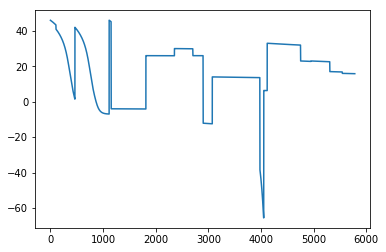

In [253]:
plt.plot(all_)

In [0]:
from sm.tsa.statespace import SARIMAX


In [0]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(history, order=(0, 1, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(len(test))[0]

In [0]:
evaluate(test, p)

RMSE: 21.455


In [0]:
predictions

[]

In [0]:
sub = pd.read_csv('SampleSubmission.csv')

In [200]:
sub.shape

(5782, 2)

In [0]:
len(all_)

5782

In [0]:
sub.Values = field1

In [0]:
sub.to_csv('final_5.csv' , index = False)

In [0]:
sub.isnull().sum()

ID        0
Values    0
dtype: int64

In [0]:
sub.head(100)

,ID,Values
0,2019-03-25 22:50:00 x Soil humidity 1,43.000000
1,2019-03-25 22:55:00 x Soil humidity 1,49.260000
2,2019-03-25 23:00:00 x Soil humidity 1,55.186667
3,2019-03-25 23:05:00 x Soil humidity 1,59.780000
4,2019-03-25 23:10:00 x Soil humidity 1,59.780000
5,2019-03-25 23:15:00 x Soil humidity 1,59.780000
6,2019-03-25 23:20:00 x Soil humidity 1,59.780000
7,2019-03-25 23:25:00 x Soil humidity 1,59.780000
8,2019-03-25 23:30:00 x Soil humidity 1,59.780000
9,2019-03-25 23:35:00 x Soil humidity 1,59.780000
